In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import re
import string
import pickle
from wordcloud import WordCloud


In [2]:
true_news = pd.read_csv('True.csv')
true_news.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [3]:
fake_news = pd.read_csv('Fake.csv')
fake_news.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
fake_news["class"] = 0
true_news["class"] = 1
# here we have created a column which includes class of the news
# if the news is fake it will show 0 and if the news is true it will show 1

In [5]:
fake_news.shape, true_news.shape
# number of entries in dataset

((23481, 5), (21417, 5))

In [6]:
fake_news_manual_testing = fake_news.tail(10)
for i in range (23480, 23470, -1):
    fake_news.drop([i], axis = 0 , inplace = True)


true_news_manual_testing = fake_news.tail(10)
for i in range (21416, 21406, -1):
    true_news.drop([i], axis = 0 , inplace = True)

In [7]:
fake_news_manual_testing["class"] = 0
true_news_manual_testing["class"] = 1

C:\Users\Aditi\AppData\Local\Temp\ipykernel_10016\2876722137.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fake_news_manual_testing["class"] = 0
C:\Users\Aditi\AppData\Local\Temp\ipykernel_10016\2876722137.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  true_news_manual_testing["class"] = 1


In [8]:
data_merged = pd.concat([fake_news, true_news], axis = 0)
data_merged.sample(10)

,title,text,subject,date,class
15866,Swiss admit drone test bungle in Golan Heights,ZURICH (Reuters) - Switzerland s defense minis...,worldnews,"November 2, 2017",1
14088,Kuwait's emir leaves hospital after successful...,DUBAI (Reuters) - Kuwait s Emir Sheikh Sabah A...,worldnews,"November 23, 2017",1
19281,"China's ruling party expels anti-graft, ex-ins...",SHANGHAI (Reuters) - China s ruling Communist ...,worldnews,"September 23, 2017",1
22773,‘Russia Did It’ – The New Age of McCarthyism,Robert Parry Consortium NewsMake no mistake ab...,Middle-east,"September 30, 2017",0
10663,Michigan Governor Snyder to testify at House h...,WASHINGTON (Reuters) - Michigan Governor Rick ...,politicsNews,"February 25, 2016",1
21102,SUPREME COURT AGREES TO TAKE ON Obama’s Un-Ame...,"So far, the Supreme Court has not prevented on...",left-news,"Jan 19, 2016",0
12851,SOCIALIST MILLENNIAL MAGNET Bernie Sanders Tel...,Hillary Clinton s campaign also announced Sund...,politics,"Oct 3, 2016",0
1598,Sh*t Just Got Real: FBI Looking Into Whether ...,FBI Director James Comey said during a Senate ...,News,"May 3, 2017",0
5571,Hillary’s GLORIOUS ‘Frozen’ Pun Just Totally ...,Donald Trump has been very busy trying to defe...,News,"July 6, 2016",0
19803,OOPS! HILLARY’S HIT WOMAN LIED About Trump Gro...,"It should be the lead story on every network, ...",left-news,"Oct 14, 2016",0


In [9]:
data_merged.shape

(44878, 5)

In [10]:
data_merged.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [11]:
data = data_merged.drop(['title', 'subject', 'date'], axis = 1)
data.head()

,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


In [12]:
data.isnull().sum()

text     0
class    0
dtype: int64

In [13]:
data = data.sample(frac = 1) # for random shuffling
data.head()

,text,class
3511,A Carrier union leader called Donald Trump out...,0
10920,"PLYMOUTH, N.H. (Reuters) - U.S. Republican pre...",1
19719,The days of the leftist media controlling the ...,0
19152,"University trustees, known as the Yale Corpora...",0
11263,SEOUL (Reuters) - China should play a key and ...,1


In [14]:
data.reset_index(inplace=True)
data.drop(['index'], axis=1, inplace=True)

data.columns

Index(['text', 'class'], dtype='object')

In [15]:
# function to process the text
def word(text) :
    # text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W", " ", text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [16]:
data['text'] = data['text'].apply(word)
data.head()

,text,class
0,A Carrier union leader called Donald Trump out...,0
1,PLYMOUTH N H Reuters U S Republican pre...,1
2,The days of the leftist media controlling the ...,0
3,University trustees known as the Yale Corpora...,0
4,SEOUL Reuters China should play a key and ...,1


In [17]:
# defining dependent and independent variable
x = data['text']
# x= x.transpose()
y = data['class']

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

x_train = pd.DataFrame(x_train.values.reshape(x_train.shape[0], -1))  # Reshape training data
x_test = pd.DataFrame(x_test.values.reshape(x_test.shape[0], -1))  # Reshape testing data

In [19]:
x_test.shape

(8976, 1)

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()

# Convert x_train and x_test to lists of strings
x_train_texts = x_train.applymap(str).apply(' '.join, axis=1).tolist()
x_test_texts = x_test.applymap(str).apply(' '.join, axis=1).tolist()


xv_train = vectorization.fit_transform(x_train_texts)
xv_test = vectorization.transform(x_test_texts)

# vectorizer = TfidfVectorizer()
# xv_train = vectorizer.fit_transform(x_train_texts)

# # Save the fitted vectorizer to a file
# with open('fitted_vectorizer.pkl', 'wb') as vectorizer_file:
#     pickle.dump(vectorizer, vectorizer_file)

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# create instances of all models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
}


for name, md in models.items():
    md.fit(xv_train,y_train)
    ypred = md.predict(xv_test)
    
    print(f"{name}  with accuracy : {accuracy_score(y_test,ypred)}")

# # Save the model to a file
    filename = f"{name.lower().replace(' ', '_')}_model.pkl"
    with open(filename, 'wb') as file:
        pickle.dump(md, file)
print("Models saved successfully.")

Logistic Regression  with accuracy : 0.9847370766488414
Decision Tree  with accuracy : 0.9955436720142602
Random Forest  with accuracy : 0.989193404634581
Bagging  with accuracy : 0.9969919786096256
AdaBoost  with accuracy : 0.9954322638146168
Models saved successfully.


In [22]:
# Define a function to load a model from a file
def load_model(filename):
    with open(filename, 'rb') as file:
        model = pickle.load(file)
    return model

# Specify the file names of the saved models
model_filenames = [
    'logistic_regression_model.pkl',
    'decision_tree_model.pkl',
    'random_forest_model.pkl',
    'bagging_model.pkl',
    'adaboost_model.pkl',
]

# Create a dictionary to store the loaded models
loaded_models = {}

# Load each model and store it in the dictionary
for filename in model_filenames:
    model_name = filename.split('_model.pkl')[0].replace('_', ' ').title()
    loaded_models[model_name] = load_model(filename)

# Now you can use the loaded_models dictionary in your code
# For example, to make predictions using the loaded models:
for name, md in loaded_models.items():
    y_pred = md.predict(xv_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} with accuracy: {accuracy}")


Logistic Regression with accuracy: 0.9847370766488414
Decision Tree with accuracy: 0.9956550802139037
Random Forest with accuracy: 0.9894162210338681
Bagging with accuracy: 0.9975490196078431
Adaboost with accuracy: 0.9954322638146168


In [23]:
def output_label(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "True News"

def manual_testing(news):
    testing_news= {"text":[news]}
    new_def_test= pd.DataFrame(testing_news)
    new_def_test ["text"]= new_def_test["text"].apply(word)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    y_pred = md.predict(new_xv_test)
    
    if y_pred == 0:
        prediction = ("Fake News") 
    elif y_pred == 1:
        prediction = ("True News")
    for name in loaded_models.keys():
        print(f"{name} : {prediction}".format(output_label(y_pred)))
    return prediction

In [24]:
news = str(input())
prediction = manual_testing(news)

Logistic Regression : Fake News
Decision Tree : Fake News
Random Forest : Fake News
Bagging : Fake News
Adaboost : Fake News


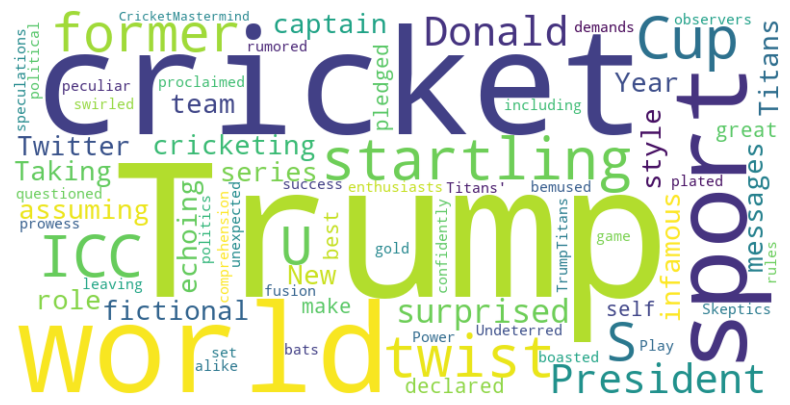

In [25]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Given news text
news_text = news

# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(news_text)

# Display the Word Cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
